In [7]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [ ]:
if not os.path.exists('trumpet.wav'):
    !wget https://github.com/k1eden/Telecom/blob/main/101491__earthsounds__tearing-kitchen-towell.wav

In [30]:
from thinkdsp import read_wave

wave = read_wave('/content/101491__earthsounds__tearing-kitchen-towell.wav')
wave.normalize()
wave.make_audio()

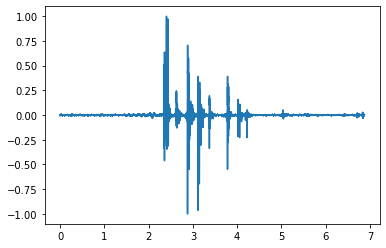

In [32]:
wave.plot()

In [33]:
segment = wave.segment(start=1.1, duration=0.3)
segment.make_audio()

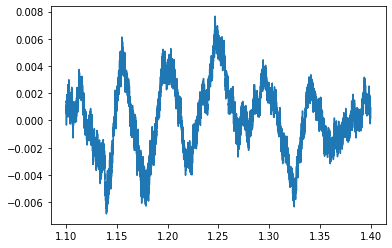

In [34]:
segment.plot()

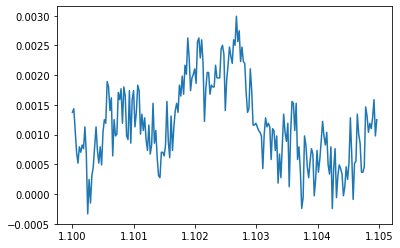

In [35]:
segment.segment(start=1.1, duration=0.005).plot()

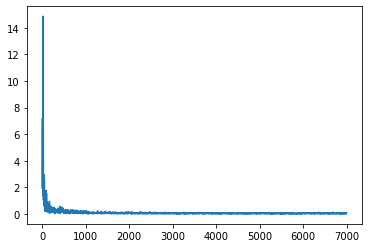

In [36]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)

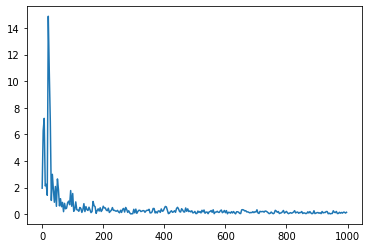

In [37]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)

In [38]:
spectrum.peaks()[:30]

[(14.87801851022694, 20.0),
 (10.662567687612327, 23.333333333333336),
 (7.199088256877529, 6.666666666666667),
 (6.963553700154084, 26.666666666666668),
 (6.269757048803274, 3.3333333333333335),
 (2.9923583836790253, 33.333333333333336),
 (2.644252738446841, 50.0),
 (2.2397749281166868, 13.333333333333334),
 (2.126363255409034, 10.0),
 (2.076674824112004, 43.333333333333336),
 (1.949615478515625, 0.0),
 (1.8489867055356388, 36.66666666666667),
 (1.836063404646973, 53.333333333333336),
 (1.7693482906219806, 93.33333333333334),
 (1.5487027075563025, 100.0),
 (1.4173136153704096, 16.666666666666668),
 (1.1604877854029783, 60.0),
 (1.028113565813994, 30.0),
 (0.9723673954467235, 86.66666666666667),
 (0.9511047806476453, 166.66666666666669),
 (0.9176691523958973, 110.0),
 (0.8918881187946478, 40.0),
 (0.8791968868562461, 66.66666666666667),
 (0.8556661494655704, 83.33333333333334),
 (0.8097517489428808, 73.33333333333334),
 (0.7849361865713304, 136.66666666666669),
 (0.7070593241973234, 90

In [39]:
spectrum.low_pass(2000)

In [40]:
spectrum.make_wave().make_audio()

In [41]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [42]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

Упражнение 2

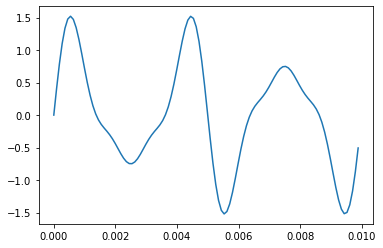

In [46]:
from thinkdsp import SinSignal

signal = (SinSignal(freq=300, amp=1.0) +
          SinSignal(freq=500, amp=0.5) +
          SinSignal(freq=700, amp=0.25))
signal.plot()

In [47]:
wave2 = signal.make_wave(duration=1)
wave2.apodize()

In [48]:
wave2.make_audio()

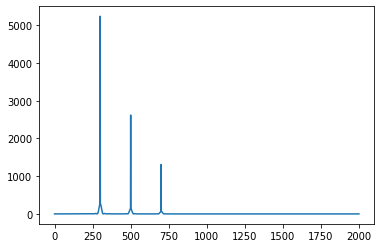

In [49]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=2000)

In [50]:
signal += SinSignal(freq=450)
signal.make_wave().make_audio()

3 Упражнение

In [51]:
wave3 = read_wave('/content/101491__earthsounds__tearing-kitchen-towell.wav')
wave3.normalize()
wave3.make_audio()

In [52]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

In [53]:
stretch(wave3, 0.5)
wave3.make_audio()

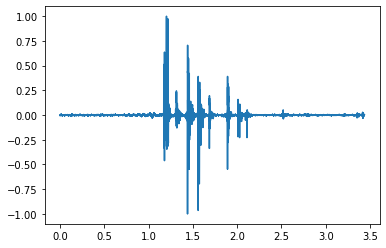

In [54]:
wave3.plot()